### Introduction
Imagine that you are a data scientist at a company that has to perform dynamic inventory management. An example of that would be a ride-sharing company where you want to know which parts of a city to direct your drivers to depending on the time of day and other factors.

Here we'll perform an analysis and then publish these findings as an easily-consumable Report for collaborators and business users.

In [1]:
### Import helper_functions
source("./helper_functions.R")

In [2]:
### Install and import required packages
# We are using a helper function that takes the name of a package as argument
# Checks if it's installed and installs it if not
# Loads the package
# List of required packages
package_list = c("devtools", "ggmap", "ggplot2"
                 , "dplyr", "tidyr", "scales")

# Call on helper function to install and import packages
for (package in package_list) {
    usePackage(package)
}

In [3]:
### Set plotting parameters and import color palettes
set_ds_theme()

### Load data
The data is in `data/processed_uber_nyc.RData` and contains two dataframes:
1. `agg_data`
2. `zone_polys`

In [5]:
load("data/processed_uber_nyc.RData")

### About the data

The source of the data for this exercise is the [Uber Pickups in New York City dataset by FiveThirtyEight](https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city). Pickup data for 20 million pickeups are aggregated by hour, date, and taxi zone (i.e., an approximate neighborhood) and enriched with calendar and weather data. More detailed information about each dataframe is below.

#### agg_data
This dataframe contains information about the number of pickups.

Fields:
* `locationID`: unique ID for each taxi zone
* `date`
* `hour`: 24H format
* `borough`: Borough that the zone is located in (e.g. Manhattan, Boorklyn, Queens)
* `zone`: Name of the taxi zone (e.g. Times Sq, Chinatown, Central Harlem)
* `picksups`: Number of pickups
* `day`: Day of week (e.g. Mon, Tue, Wed)
* `is_holiday`: Whether that day was a holiday (Boolean)
* `mean_temp_F`: Mean temperature that day in Fahrenheit

In [6]:
head(agg_data, 3)

locationID,date,hour,borough,zone,pickups,day,is_holiday,mean_temp_F
1,2014-04-01,03,EWR,Newark Airport,2,Tue,FALSE,47
1,2014-04-01,04,EWR,Newark Airport,4,Tue,FALSE,47
1,2014-04-01,05,EWR,Newark Airport,4,Tue,FALSE,47


#### zone_polys
This is a dimension table that describes the boundaries of each taxi zone.

Fields:
* `long`: Longitude
* `lat`: Latitude
* `order`: Rank of point when drawing boundary
* `hole`: Whether to plot a hole in that location (Boolean)
* `piece`: The piece of the zone that the point is associated with
* `id`: ID of zone. Same as locationID in agg_data
* `group`: Group that the point belongs to

In [7]:
head(zone_polys, 3)

long,lat,order,hole,piece,id,group
-74.18445,40.69500,1,FALSE,1,1,0.1
-74.18449,40.69509,2,FALSE,1,1,0.1
-74.18450,40.69518,3,FALSE,1,1,0.1


### Exploratory analysis

#### What areas experience the highest demand?

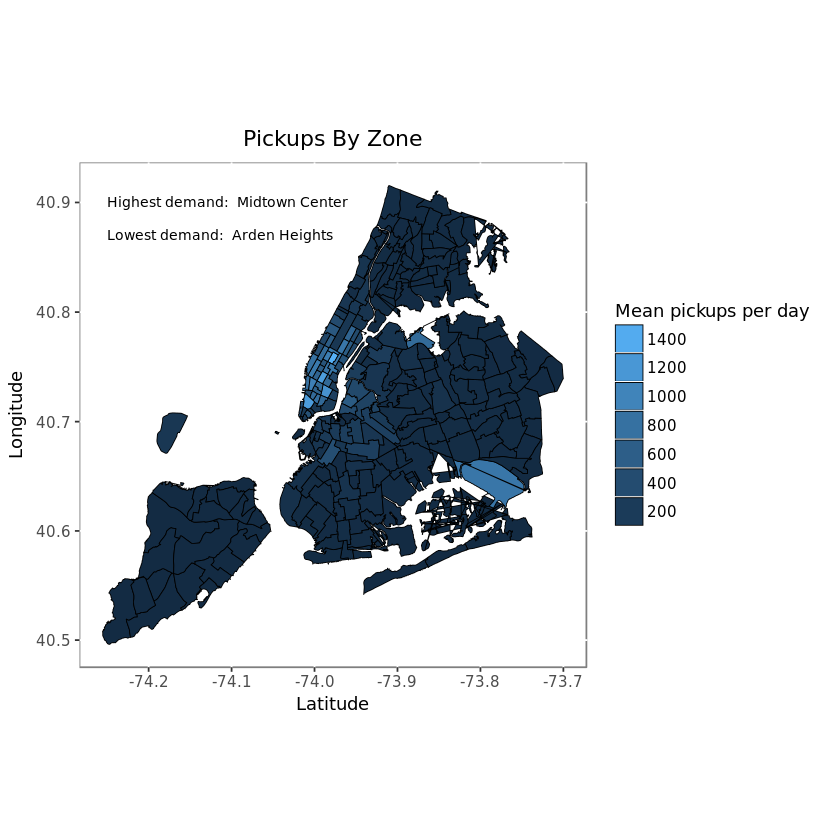

In [8]:
# Calculate daily mean pickups of each taxi zone
geo_pickups = agg_data %>%
    group_by(locationID, date) %>%
    summarize(day_pickups = sum(pickups)) %>%
    group_by(locationID) %>%
    summarize(mean_pickup = mean(day_pickups))

# Get top and bottom zones
locID_zone_dim = locID_zone_dim = unique(agg_data[, c("locationID", "zone")])
top_zone = geo_pickups[which.max(geo_pickups$mean_pickup), ] %>%
    left_join(locID_zone_dim, by = "locationID") 
bottom_zone = geo_pickups[which.min(geo_pickups$mean_pickup), ] %>%
    left_join(locID_zone_dim, by = "locationID") 

# Visualize this data as a heatmap
heatmap = right_join(zone_polys, geo_pickups, by = c("id" = "locationID"))
ggplot() + 
    geom_polygon(data = heatmap
                 , aes(x = long, y = lat, group = id, fill = mean_pickup)
                 , color = "black"
                 , size = 0.25) + 
    scale_fill_continuous(cont_gradient
                         , name = "Mean pickups per day"
                         , breaks = pretty_breaks (n = 7)) + 
    annotate("text"
             , x = -74.25
             , y = 40.9
             , label = paste("Highest demand: ", as.character(top_zone$zone))
             , hjust = 0
             , size = 3) +
    annotate("text"
             , x = -74.25
             , y = 40.87
             , label = paste("Lowest demand: ", as.character(bottom_zone$zone))
             , hjust = 0
             , size = 3) +
    guides(fill = guide_legend(reverse = TRUE)) +
    coord_map() + 
    labs(x = "Latitude"
        , y = "Longitude"
        , title = "Pickups By Zone")

Insights:
* Fill me in with some insightful insights :-)
* Changing some stuff again for demo